In [43]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# Read CSV file into a Dataframe

In [44]:
movies = pd.read_csv("IMDb_Clean.csv")

In [45]:
movies.head()

,Movie_name,Genre,Overview,Year,Time,Rating,Certificate,Votes,Gross(Million_$),Metascore,Director,Actors
0,The Northman,"Action, Adventure, Drama",From visionary director Robert Eggers comes Th...,2022.0,137.0,7.5,14A,75608.0,NaN,82.0,Robert Eggers,"Alexander Skarsgård,Nicole Kidman,Claes Bang,E..."
1,The Batman,"Action, Crime, Drama",When a sadistic serial killer begins murdering...,2022.0,176.0,8.0,PG,470895.0,NaN,72.0,Matt Reeves,"Robert Pattinson,Zoë Kravitz,Jeffrey Wright,Co..."
2,The Lost City,"Action, Adventure, Comedy",A reclusive romance novelist on a book tour wi...,2022.0,112.0,6.3,PG,38561.0,NaN,60.0,Aaron Nee,"Adam Nee,Sandra Bullock,Channing Tatum,Daniel ..."
3,Everything Everywhere All at Once,"Action, Adventure, Comedy",An aging Chinese immigrant is swept up in an i...,2022.0,139.0,8.7,14A,45050.0,NaN,81.0,Dan Kwan,"Daniel Scheinert,Michelle Yeoh,Stephanie Hsu,K..."
4,Operation Mincemeat,"Drama, War","During WWII, two intelligence officers use a c...",2021.0,128.0,6.7,14A,6776.0,NaN,65.0,John Madden,"Colin Firth,Matthew Macfadyen,Kelly Macdonald,..."


# Cheking Null values and Data types

In [46]:
#Currently, we are not removing rows that contain null values. We will remove these rows later.
movies.isnull().sum()

Movie_name               0
Genre                 7973
Overview             33173
Year                   200
Time                 31192
Rating               50631
Certificate         136032
Votes                50631
Gross(Million_$)    143242
Metascore           140588
Director              4325
Actors                5757
dtype: int64

In [47]:
movies.dtypes

Movie_name           object
Genre                object
Overview             object
Year                float64
Time                float64
Rating              float64
Certificate          object
Votes               float64
Gross(Million_$)    float64
Metascore           float64
Director             object
Actors               object
dtype: object

In [48]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149922 entries, 0 to 149921
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Movie_name        149922 non-null  object 
 1   Genre             141949 non-null  object 
 2   Overview          116749 non-null  object 
 3   Year              149722 non-null  float64
 4   Time              118730 non-null  float64
 5   Rating            99291 non-null   float64
 6   Certificate       13890 non-null   object 
 7   Votes             99291 non-null   float64
 8   Gross(Million_$)  6680 non-null    float64
 9   Metascore         9334 non-null    float64
 10  Director          145597 non-null  object 
 11  Actors            144165 non-null  object 
dtypes: float64(6), object(6)
memory usage: 13.7+ MB


In [49]:
movies.describe()

,Year,Time,Rating,Votes,Gross(Million_$),Metascore
count,149722.000000,118730.000000,99291.000000,9.929100e+04,6680.000000,9334.000000
mean,2014.423131,96.054317,5.874749,5.425245e+03,23.508692,55.387079
std,4.720293,44.357386,1.433923,4.095977e+04,59.988082,17.136397
min,2005.000000,1.000000,1.000000,5.000000e+00,0.000000,1.000000
25%,2011.000000,82.000000,5.000000,2.500000e+01,0.050000,43.000000
50%,2015.000000,93.000000,6.000000,1.020000e+02,0.620000,56.000000
75%,2018.000000,107.000000,6.800000,5.620000e+02,18.360000,68.000000
max,2022.000000,10062.000000,10.000000,2.558124e+06,936.660000,100.000000


In [50]:
movies.corr()

,Year,Time,Rating,Votes,Gross(Million_$),Metascore
Year,1.000000,0.003399,0.014505,-0.039753,0.033765,0.097291
Time,0.003399,1.000000,0.070770,0.061983,0.168413,0.171672
Rating,0.014505,0.070770,1.000000,0.089860,0.176022,0.651316
Votes,-0.039753,0.061983,0.089860,1.000000,0.725506,0.163125
Gross(Million_$),0.033765,0.168413,0.176022,0.725506,1.000000,0.057768
Metascore,0.097291,0.171672,0.651316,0.163125,0.057768,1.000000


<AxesSubplot:>

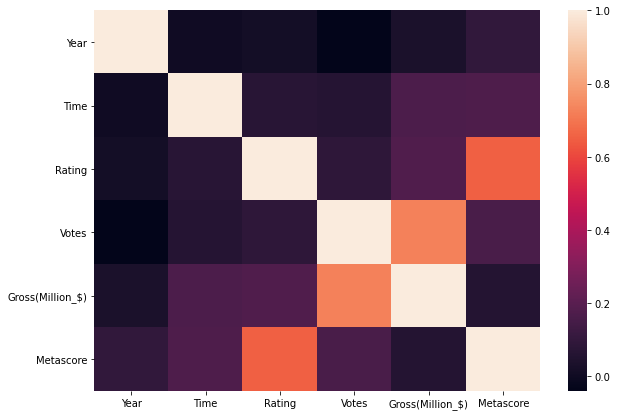

In [51]:
plt.figure(figsize=(10,7))
sns.heatmap(movies.corr())

In [52]:
sns.displot(movies)

KeyboardInterrupt: 

Error in callback <function flush_figures at 0x00000244A15A7CA0> (for post_execute):


KeyboardInterrupt: 

# Top Voted Movies

In [53]:
#sorting values by votes in decending orders, so we can see top voted movies at top.
top_voted = movies.sort_values(["Votes"], ascending=False)

In [54]:
top_voted.head()

,Movie_name,Genre,Overview,Year,Time,Rating,Certificate,Votes,Gross(Million_$),Metascore,Director,Actors
47,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,2008.0,152.0,9.0,PG,2558124.0,534.86,84.0,Christopher Nolan,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich..."
102,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,2010.0,148.0,8.8,PG,2270679.0,292.58,74.0,Christopher Nolan,"Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ..."
83,Interstellar,"Adventure, Drama, Sci-Fi",A team of explorers travel through a wormhole ...,2014.0,169.0,8.6,PG,1730825.0,188.02,74.0,Christopher Nolan,"Matthew McConaughey,Anne Hathaway,Jessica Chas..."
172,The Dark Knight Rises,"Action, Crime, Drama",Eight years after the Joker's reign of anarchy...,2012.0,164.0,8.4,14A,1653455.0,448.14,78.0,Christopher Nolan,"Christian Bale,Tom Hardy,Anne Hathaway,Gary Ol..."
143,Django Unchained,"Drama, Western","With the help of a German bounty-hunter, a fre...",2012.0,165.0,8.4,18A,1495769.0,162.81,81.0,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio,K..."


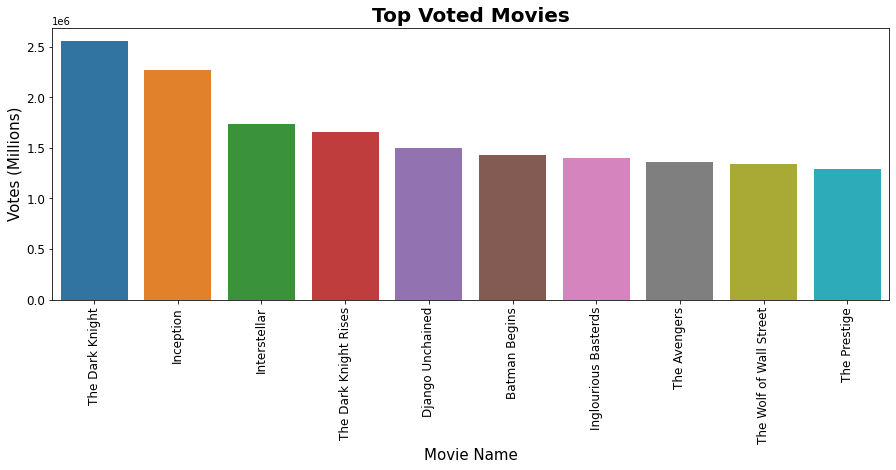

In [55]:
#Top 10 Most Voted Movies from 1000 top rated movies.
plt.figure(figsize=(15,5))
sns.barplot(x = top_voted["Movie_name"][:10], y = top_voted["Votes"][:10]) 
plt.title("Top Voted Movies" ,weight = "bold", size = 20)
plt.xlabel('Movie Name', fontsize = 15 )
plt.ylabel("Votes (Millions)", fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks( fontsize = 12)
plt.show()

# Top Rated Movies

In [56]:
#Here we are sorting our data by  rating and votes
#If we sort data only with ratings, it might be possible that only some people rated a movie with a good rating.
top_rated = movies.sort_values(["Votes","Rating"], ascending= False) 


In [57]:
top_rated.head()

,Movie_name,Genre,Overview,Year,Time,Rating,Certificate,Votes,Gross(Million_$),Metascore,Director,Actors
47,The Dark Knight,"Action, Crime, Drama",When the menace known as the Joker wreaks havo...,2008.0,152.0,9.0,PG,2558124.0,534.86,84.0,Christopher Nolan,"Christian Bale,Heath Ledger,Aaron Eckhart,Mich..."
102,Inception,"Action, Adventure, Sci-Fi",A thief who steals corporate secrets through t...,2010.0,148.0,8.8,PG,2270679.0,292.58,74.0,Christopher Nolan,"Leonardo DiCaprio,Joseph Gordon-Levitt,Elliot ..."
83,Interstellar,"Adventure, Drama, Sci-Fi",A team of explorers travel through a wormhole ...,2014.0,169.0,8.6,PG,1730825.0,188.02,74.0,Christopher Nolan,"Matthew McConaughey,Anne Hathaway,Jessica Chas..."
172,The Dark Knight Rises,"Action, Crime, Drama",Eight years after the Joker's reign of anarchy...,2012.0,164.0,8.4,14A,1653455.0,448.14,78.0,Christopher Nolan,"Christian Bale,Tom Hardy,Anne Hathaway,Gary Ol..."
143,Django Unchained,"Drama, Western","With the help of a German bounty-hunter, a fre...",2012.0,165.0,8.4,18A,1495769.0,162.81,81.0,Quentin Tarantino,"Jamie Foxx,Christoph Waltz,Leonardo DiCaprio,K..."


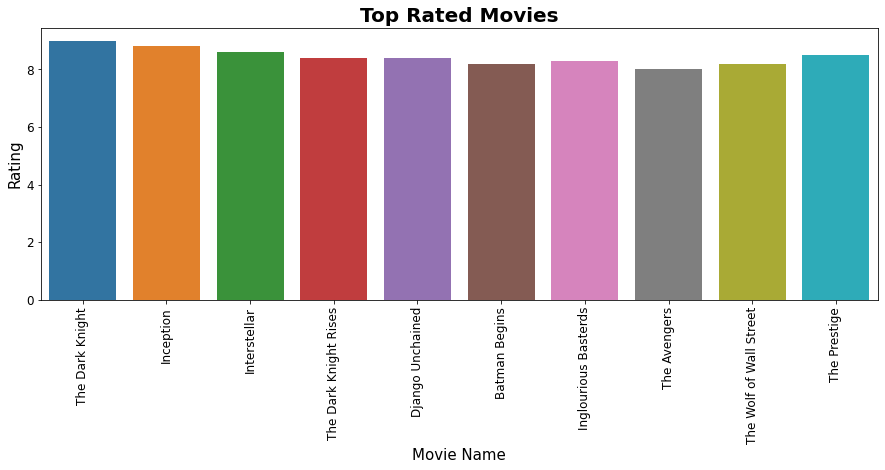

In [58]:
#Top 10 movies with Highest rating.
plt.figure(figsize=(15,5))
sns.barplot(x = top_rated["Movie_name"][:10], y = top_rated["Rating"][:10])
plt.title("Top Rated Movies", weight = "bold", size = 20)
plt.xlabel('Movie Name', fontsize = 15 )
plt.ylabel('Rating', fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks( fontsize = 12)
plt.show()

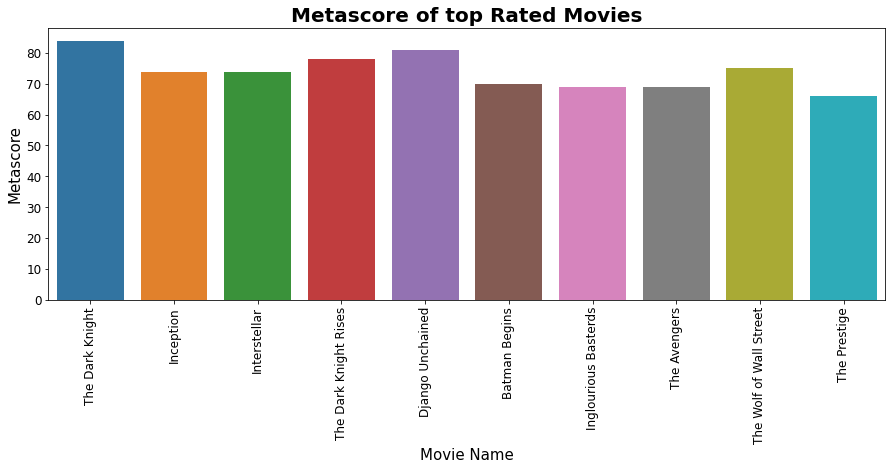

In [59]:
#Meta score of Top rated movies
plt.figure(figsize=(15,5))
sns.barplot(x = top_rated["Movie_name"][:10], y = top_rated["Metascore"][:10])
plt.title("Metascore of top Rated Movies", weight = "bold", size = 20)
plt.xlabel('Movie Name', fontsize = 15 )
plt.ylabel('Metascore', fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks( fontsize = 12)
plt.show()

# Movies with highest Gross 

In [60]:
#Sorting data by Gross in descending order
highest_gross = movies.sort_values(["Gross(Million_$)"], ascending  = False)


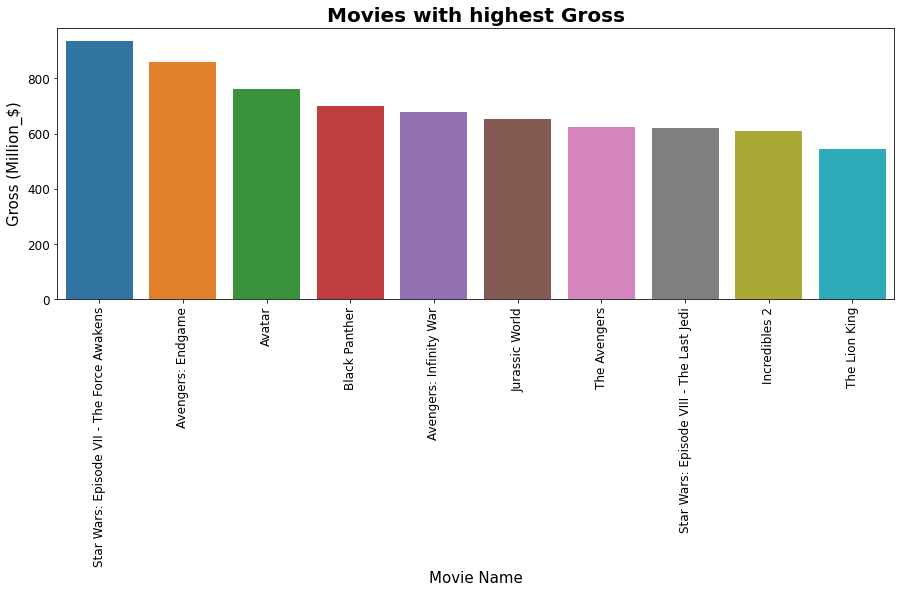

In [61]:



plt.figure(figsize=(15,5))
sns.barplot(x = highest_gross["Movie_name"][:10], y = highest_gross["Gross(Million_$)"][:10])
plt.title("Movies with highest Gross", weight = "bold", size = 20)
plt.xlabel('Movie Name', fontsize = 15 )
plt.ylabel('Gross (Million_$)', fontsize = 15)
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()

# Directors who has directed maximum movies

In [62]:
#Grouping data by Director to count how many movies directed by each Directore
director = movies.groupby("Director")["Movie_name"].count() 

#Sorting data  by  number of movies Directed in descend order
director.sort_values(ascending = False ,inplace = True)

#Converting retrieved series data into a data frame. We are resetting the index because we want directors name as a column, not as an index.
director = director.to_frame().reset_index()

#Renaming the columns
director = director.rename(columns={"Movie_name": "Number_of_Movies"})
director.head()

,Director,Number_of_Movies
0,Nayato Fio Nuala,76
1,Dustin Ferguson,58
2,Curtis Everitt,56
3,Rajiv Chilaka,54
4,Rajesh Bhuyan,53


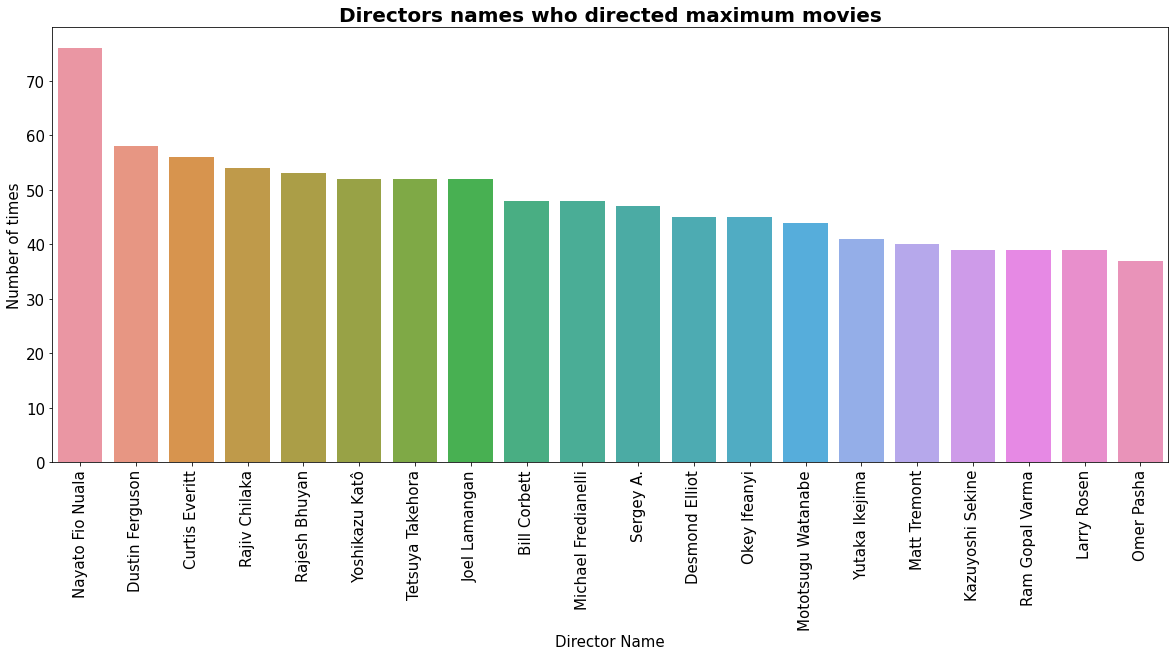

In [63]:
plt.figure(figsize = (20,8))
sns.barplot(x = director["Director"][:20], y = director["Number_of_Movies"][:20])
plt.title("Directors names who directed maximum movies", weight = "bold", size = 20)
plt.xlabel('Director Name', fontsize = 15 )
plt.ylabel('Number of times', fontsize = 15)
plt.xticks(rotation=90, fontsize = 15)
plt.yticks(fontsize = 15)

plt.show()

In [64]:
 
clean_movies = movies

In [65]:
clean_movies.isna().sum()

Movie_name               0
Genre                 7973
Overview             33173
Year                   200
Time                 31192
Rating               50631
Certificate         136032
Votes                50631
Gross(Million_$)    143242
Metascore           140588
Director              4325
Actors                5757
dtype: int64

# Highest Rated Genre

In [66]:
#Creating separate dataframe to calculate the highest rated genre
genre_rating = clean_movies[["Genre","Rating"]].dropna()
genre_rating.head()

,Genre,Rating
0,"Action, Adventure, Drama",7.5
1,"Action, Crime, Drama",8.0
2,"Action, Adventure, Comedy",6.3
3,"Action, Adventure, Comedy",8.7
4,"Drama, War",6.7


In [67]:
#setting Rating as index  
genre_rating.set_index("Rating" , inplace = True)


In [68]:
genre_rating.head()

,Genre
Rating,
7.5,"Action, Adventure, Drama"
8.0,"Action, Crime, Drama"
6.3,"Action, Adventure, Comedy"
8.7,"Action, Adventure, Comedy"
6.7,"Drama, War"


In [69]:
#spliting  genre by ", " to separate each genre.
genre = genre_rating['Genre'].str.split(',')

#exploding lists to convert each list element to series 
genre_rating_exp = genre.explode()

In [70]:
genre_rating_exp.head()

Rating
7.5                Action
7.5             Adventure
7.5     Drama            
8.0                Action
8.0                 Crime
Name: Genre, dtype: object

In [71]:
#removing leading and the trailing spaces of each genre.
genre_rating_exp = genre_rating_exp.str.strip()
genre_rating_exp

Rating
7.5       Action
7.5    Adventure
7.5        Drama
8.0       Action
8.0        Crime
         ...    
4.2      Musical
5.6        Drama
3.9       Horror
7.1       Comedy
7.4        Drama
Name: Genre, Length: 176413, dtype: object

In [72]:
#converting exploded series into dataFrame. Sorting data frame by index(Genre)
genre_rating_counted= genre_rating_exp.value_counts().to_frame().sort_index(axis = 0, ascending = True)
genre_rating_counted.head()

,Genre
Action,12092
Adult,2
Adventure,5666
Animation,2973
Biography,2172


In [73]:
#Resetting index
genre_rating_exp = genre_rating_exp.reset_index()
genre_rating_exp

,Rating,Genre
0,7.5,Action
1,7.5,Adventure
2,7.5,Drama
3,8.0,Action
4,8.0,Crime
...,...,...
176408,4.2,Musical
176409,5.6,Drama
176410,3.9,Horror
176411,7.1,Comedy


In [74]:
#Grouping data exploded data by Genre to calculate sum of rating for each genre.
grouped_genre_rating =genre_rating_exp.groupby("Genre")["Rating"].sum() 

In [75]:
#converting grouped data in to dataframe
grouped_genre_rating_df = grouped_genre_rating.to_frame()

In [76]:
grouped_genre_rating_df.head()

,Rating
Genre,
Action,67761.3
Adult,10.2
Adventure,32809.0
Animation,18410.2
Biography,14251.6


In [77]:
#concating total rating and genre count in to single dataframe
genre_rating_final = pd.concat([grouped_genre_rating_df,genre_rating_counted], axis = 1, join = "inner")
genre_rating_final.head()

,Rating,Genre
Action,67761.3,12092
Adult,10.2,2
Adventure,32809.0,5666
Animation,18410.2,2973
Biography,14251.6,2172


In [78]:
#Renaming  data frame
genre_rating_final=genre_rating_final.rename(columns={"Rating": "IMDB_Rating", "Genre": "Genre_Count"})

In [79]:
genre_rating_final = genre_rating_final.rename_axis('Genre')

In [80]:
genre_rating_final

,IMDB_Rating,Genre_Count
Genre,,
Action,67761.3,12092
Adult,10.2,2
Adventure,32809.0,5666
Animation,18410.2,2973
Biography,14251.6,2172
Comedy,168770.3,29119
Crime,48439.7,8232
Drama,323252.7,52288
Family,27791.1,4660


In [81]:
#calculating average rating for each genre.
genre_rating_final["Averages_By_Genre"] = genre_rating_final["IMDB_Rating"] / genre_rating_final["Genre_Count"]

In [82]:
genre_rating_final.head()

,IMDB_Rating,Genre_Count,Averages_By_Genre
Genre,,,
Action,67761.3,12092,5.603812
Adult,10.2,2,5.100000
Adventure,32809.0,5666,5.790505
Animation,18410.2,2973,6.192466
Biography,14251.6,2172,6.561510


In [83]:
genre_rating_final = genre_rating_final.reset_index()
genre_rating_final

,Genre,IMDB_Rating,Genre_Count,Averages_By_Genre
0,Action,67761.3,12092,5.603812
1,Adult,10.2,2,5.100000
2,Adventure,32809.0,5666,5.790505
3,Animation,18410.2,2973,6.192466
4,Biography,14251.6,2172,6.561510
5,Comedy,168770.3,29119,5.795882
6,Crime,48439.7,8232,5.884317
7,Drama,323252.7,52288,6.182158
8,Family,27791.1,4660,5.963755
9,Fantasy,22614.0,3928,5.757128


In [84]:
genre_rating_final = genre_rating_final.drop(genre_rating_final[genre_rating_final.Genre_Count <=20].index)

In [85]:
df = df.drop(df[df.score < 50].index)

NameError: name 'df' is not defined

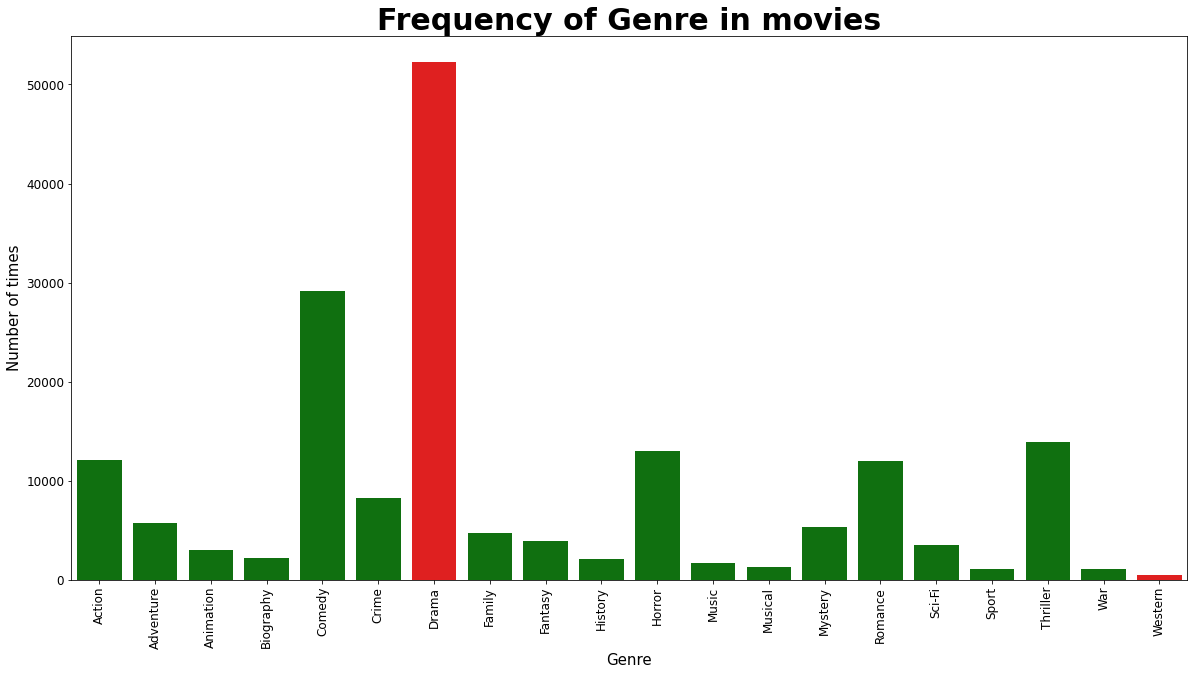

In [86]:

gen = genre_rating_final["Genre"]
gen_rat = genre_rating_final["Genre_Count"]

plt.figure(figsize = (20,10))
clrs = ['green' if (x < max(gen_rat) and x > min(gen_rat)) else 'red' for x in gen_rat ]
sns.barplot(x = gen, y = gen_rat ,palette=clrs)
plt.title("Frequency of Genre in movies", fontsize = 30,weight = 'bold')
plt.xlabel('Genre', fontsize = 15)
plt.ylabel('Number of times', fontsize = 15 )
plt.xticks(rotation=90 ,fontsize = 12 )
plt.yticks(fontsize = 12 )

plt.show()

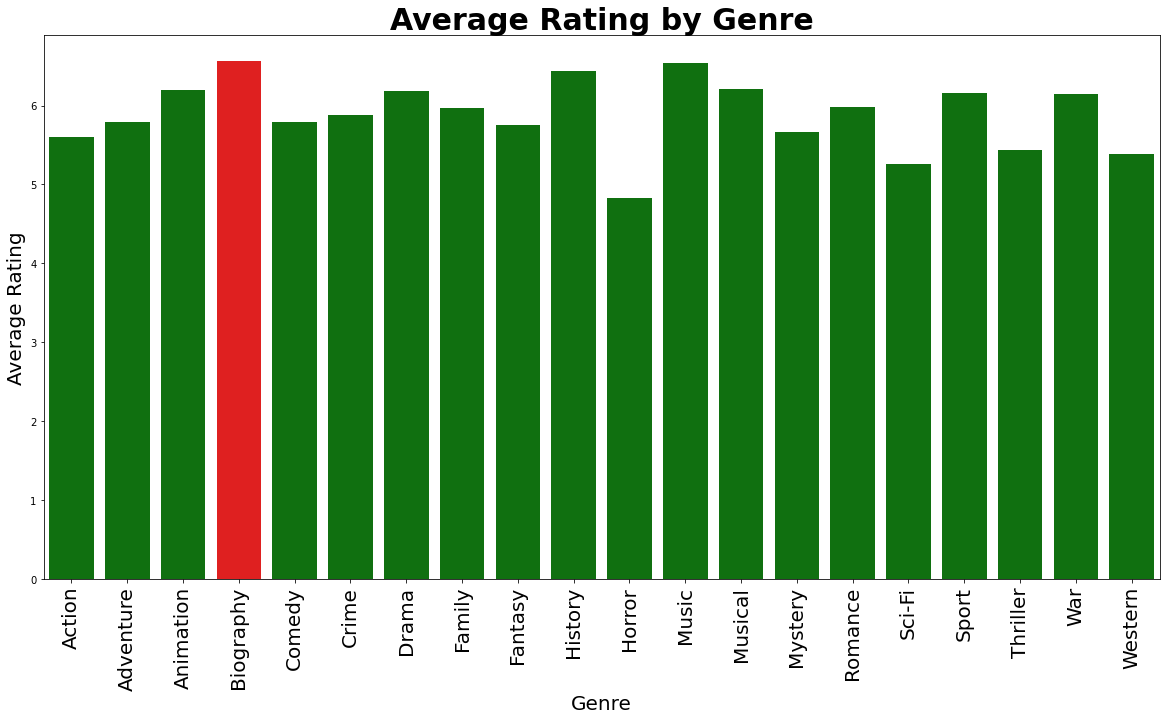

In [87]:
#On average which genre is the most highly rated?
plt.figure(figsize = (20,10))
clrs = ['green' if (x < max(genre_rating_final["Averages_By_Genre"])) else 'red' for x in genre_rating_final["Averages_By_Genre"] ]
sns.barplot(x = genre_rating_final["Genre"],y = genre_rating_final["Averages_By_Genre"] ,palette=clrs)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating by Genre", fontsize = 30, weight = 'bold')
plt.xticks(rotation=90, fontsize = 20)
plt.show()
plt.show()

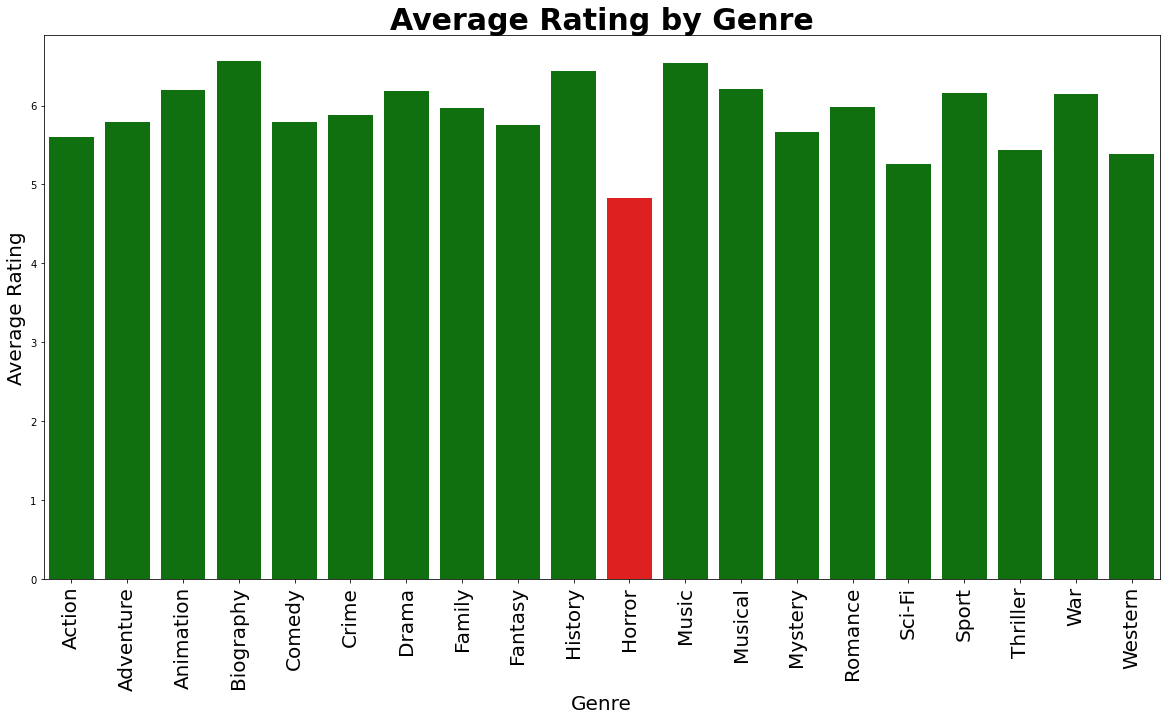

In [89]:
#On average which genre is the least rated?
plt.figure(figsize = (20,10))
clrs = ['green' if (x > min(genre_rating_final["Averages_By_Genre"])) else 'red' for x in genre_rating_final["Averages_By_Genre"] ]
sns.barplot(x = genre_rating_final["Genre"], y = genre_rating_final["Averages_By_Genre"] ,palette=clrs)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Rating", fontsize = 20)
plt.title("Average Rating by Genre", fontsize = 30, weight = 'bold')
plt.xticks(rotation=90, fontsize = 20)
plt.show()
plt.show()

# Genre with highest Gross money

In [90]:
genre_gross = clean_movies[["Genre","Gross(Million_$)"]]

In [91]:
genre_gross = genre_gross.dropna()
genre_gross.isna().sum()

Genre               0
Gross(Million_$)    0
dtype: int64

In [92]:
genre_gross

,Genre,Gross(Million_$)
7,"Action, Adventure, Fantasy",232.64
13,"Action, Adventure, Fantasy",760.51
17,"Comedy, Drama",13.10
22,"Action, Adventure, Fantasy",335.06
24,"Action, Adventure, Fantasy",164.87
...,...,...
131297,Horror,0.12
133456,Comedy,0.00
134262,Drama,0.00
134771,"Drama, Romance",0.07


In [93]:
genre_gross.set_index("Gross(Million_$)", inplace = True)

In [94]:
genre_gross.head()

,Genre
Gross(Million_$),
232.64,"Action, Adventure, Fantasy"
760.51,"Action, Adventure, Fantasy"
13.10,"Comedy, Drama"
335.06,"Action, Adventure, Fantasy"
164.87,"Action, Adventure, Fantasy"


In [95]:
genre1 = genre_gross["Genre"].str.split(", ")
genre_gross_exp = genre1.explode()
genre_gross_exp.head()

Gross(Million_$)
232.64                 Action
232.64              Adventure
232.64    Fantasy            
760.51                 Action
760.51              Adventure
Name: Genre, dtype: object

In [96]:
genre_gross_exp = genre_gross_exp.str.strip()
genre_gross_exp.head()

Gross(Million_$)
232.64       Action
232.64    Adventure
232.64      Fantasy
760.51       Action
760.51    Adventure
Name: Genre, dtype: object

In [97]:
genre_gross_value_count = genre_gross_exp.value_counts().to_frame().sort_index(axis = 0, ascending = True)
genre_gross_value_count

,Genre
Action,1341
Adventure,967
Animation,332
Biography,496
Comedy,2404
Crime,1003
Drama,4253
Family,307
Fantasy,420
History,271


In [98]:
genre_gross_exp = genre_gross_exp.reset_index()
genre_gross_exp

,Gross(Million_$),Genre
0,232.64,Action
1,232.64,Adventure
2,232.64,Fantasy
3,760.51,Action
4,760.51,Adventure
...,...,...
15955,0.07,Drama
15956,0.07,Romance
15957,0.00,Comedy
15958,0.00,Drama


In [99]:
grouped_genre_gross = genre_gross_exp.groupby("Genre")["Gross(Million_$)"].sum()
grouped_genre_gross = grouped_genre_gross.to_frame()
grouped_genre_gross

,Gross(Million_$)
Genre,
Action,69813.10
Adventure,78391.83
Animation,23422.17
Biography,8679.43
Comedy,59462.53
Crime,18561.52
Drama,50280.17
Family,13072.84
Fantasy,19186.33


In [100]:
genre_gross_final = pd.concat([grouped_genre_gross,genre_gross_value_count], axis = 1, join = "inner" )
genre_gross_final = genre_gross_final.rename(columns = {"Gross(Million_$)":"Total_Gross(Million_$)", "Genre":"Genre_count"})
genre_gross_final = genre_gross_final.rename_axis("Genre")
genre_gross_final

,Total_Gross(Million_$),Genre_count
Genre,,
Action,69813.10,1341
Adventure,78391.83,967
Animation,23422.17,332
Biography,8679.43,496
Comedy,59462.53,2404
Crime,18561.52,1003
Drama,50280.17,4253
Family,13072.84,307
Fantasy,19186.33,420


In [101]:
genre_gross_final["Average_by_Genre"]  = round(genre_gross_final["Total_Gross(Million_$)"] / genre_gross_final["Genre_count"],2)
genre_gross_final = genre_gross_final.reset_index()
genre_gross_final

,Genre,Total_Gross(Million_$),Genre_count,Average_by_Genre
0,Action,69813.10,1341,52.06
1,Adventure,78391.83,967,81.07
2,Animation,23422.17,332,70.55
3,Biography,8679.43,496,17.50
4,Comedy,59462.53,2404,24.73
5,Crime,18561.52,1003,18.51
6,Drama,50280.17,4253,11.82
7,Family,13072.84,307,42.58
8,Fantasy,19186.33,420,45.68
9,History,2935.02,271,10.83


In [102]:
genre_gross_final = genre_gross_final.drop(genre_gross_final[genre_gross_final.Genre_count <=20].index)
genre_gross_final

,Genre,Total_Gross(Million_$),Genre_count,Average_by_Genre
0,Action,69813.10,1341,52.06
1,Adventure,78391.83,967,81.07
2,Animation,23422.17,332,70.55
3,Biography,8679.43,496,17.50
4,Comedy,59462.53,2404,24.73
5,Crime,18561.52,1003,18.51
6,Drama,50280.17,4253,11.82
7,Family,13072.84,307,42.58
8,Fantasy,19186.33,420,45.68
9,History,2935.02,271,10.83


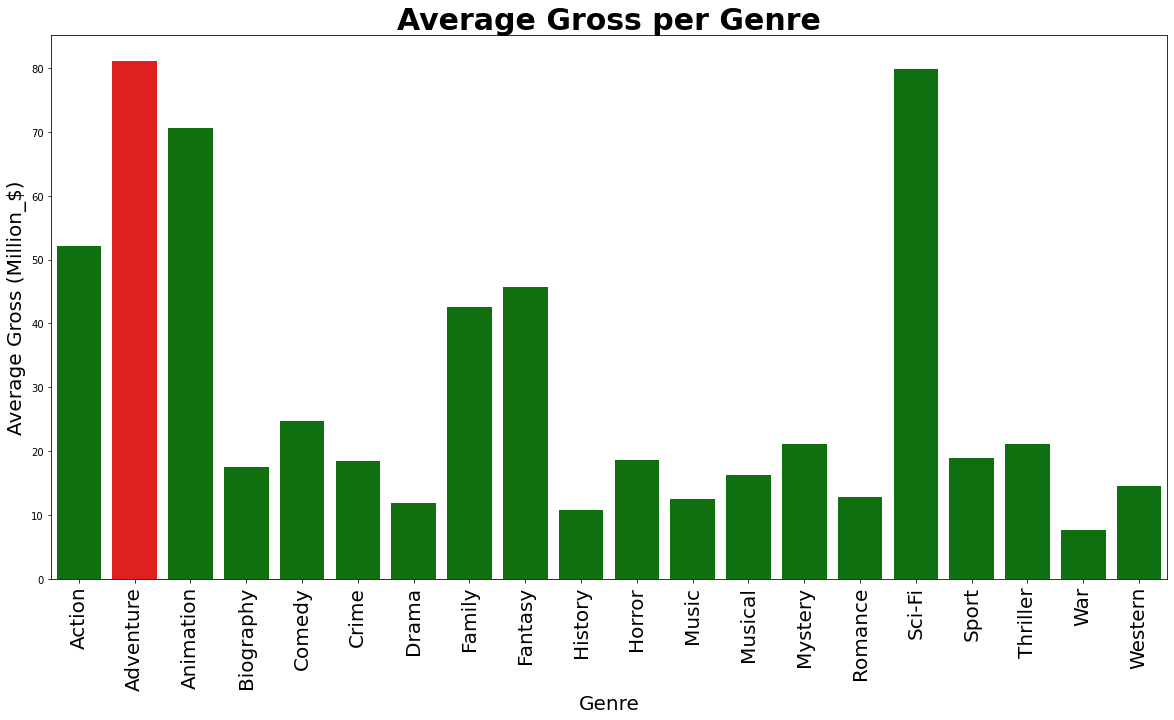

In [103]:
#On average which movie genre makes the most gross money and which genre makes the least?
plt.figure(figsize = (20,10))
clrs = ['green' if (x < max(genre_gross_final["Average_by_Genre"])) else 'red' for x in genre_gross_final["Average_by_Genre"] ]
sns.barplot(x = genre_gross_final["Genre"], y = genre_gross_final["Average_by_Genre"] ,palette = clrs)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Gross (Million_$)", fontsize = 20)
plt.title("Average Gross per Genre", fontsize = 30, weight = 'bold')
plt.xticks(rotation=90, fontsize = 20)
plt.show()
plt.show()

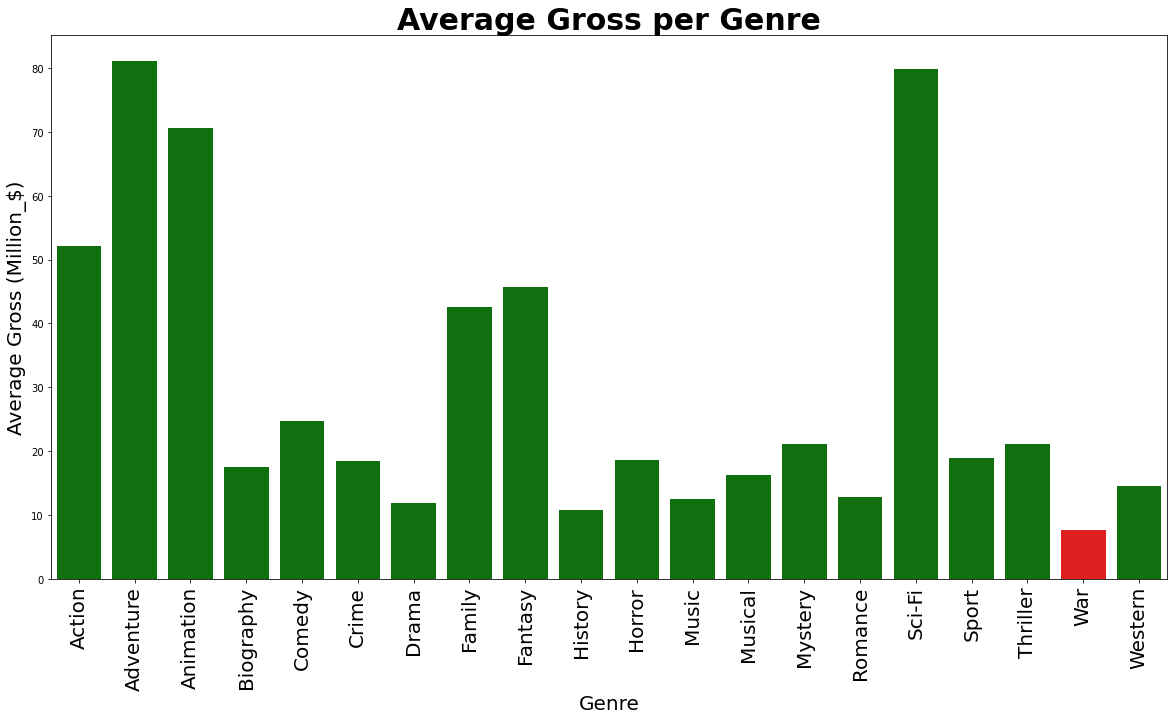

In [104]:
#On average which movie genre makes the most gross money and which genre makes the least?
plt.figure(figsize = (20,10))
clrs = ['green' if (x > min(genre_gross_final["Average_by_Genre"])) else 'red' for x in genre_gross_final["Average_by_Genre"] ]
sns.barplot(x = genre_gross_final["Genre"], y = genre_gross_final["Average_by_Genre"] ,palette = clrs)
plt.xlabel('Genre', fontsize = 20)
plt.ylabel("Average Gross (Million_$)", fontsize = 20)
plt.title("Average Gross per Genre", fontsize = 30, weight = 'bold')
plt.xticks(rotation=90, fontsize = 20)
plt.show()
plt.show()

# Genre with highest Metascore

In [105]:
genre_meta = clean_movies[["Genre", "Metascore"]]

In [106]:
genre_meta = genre_meta.dropna()
genre_meta.isna().sum()

Genre        0
Metascore    0
dtype: int64

In [107]:
genre_meta.head()

,Genre,Metascore
0,"Action, Adventure, Drama",82.0
1,"Action, Crime, Drama",72.0
2,"Action, Adventure, Comedy",60.0
3,"Action, Adventure, Comedy",81.0
4,"Drama, War",65.0


In [108]:
genre_meta.set_index("Metascore", inplace = True)
genre_meta

,Genre
Metascore,
82.0,"Action, Adventure, Drama"
72.0,"Action, Crime, Drama"
60.0,"Action, Adventure, Comedy"
81.0,"Action, Adventure, Comedy"
65.0,"Drama, War"
...,...
78.0,Drama
35.0,"Adventure, Comedy"
61.0,"Drama, History"


In [109]:
genre2 = genre_meta["Genre"].str.split(", ")
genre_meta_exp = genre2.explode()
genre_meta_exp = genre_meta_exp.str.strip()
genre_meta_exp

Metascore
82.0       Action
82.0    Adventure
82.0        Drama
72.0       Action
72.0        Crime
          ...    
30.0       Comedy
30.0        Drama
30.0       Family
58.0        Drama
58.0      Musical
Name: Genre, Length: 21623, dtype: object

In [110]:
genre_meta_value_count = genre_meta_exp.value_counts().to_frame().sort_index(axis = 0, ascending = True)

In [111]:
genre_meta_value_count

,Genre
Action,1493
Adventure,1117
Animation,379
Biography,661
Comedy,3054
Crime,1344
Drama,6238
Family,323
Fantasy,537
History,351


In [112]:
genre_meta_exp = genre_meta_exp.reset_index()
genre_meta_exp

,Metascore,Genre
0,82.0,Action
1,82.0,Adventure
2,82.0,Drama
3,72.0,Action
4,72.0,Crime
...,...,...
21618,30.0,Comedy
21619,30.0,Drama
21620,30.0,Family
21621,58.0,Drama


In [113]:
genre_meta_grouped = genre_meta_exp.groupby("Genre")["Metascore"].sum().to_frame()
genre_meta_grouped

,Metascore
Genre,
Action,74377.0
Adventure,61090.0
Animation,22987.0
Biography,39608.0
Comedy,161235.0
Crime,72492.0
Drama,367406.0
Family,16485.0
Fantasy,28409.0


In [114]:
genre_meta_final = pd.concat([genre_meta_grouped, genre_meta_value_count],axis = 1, join = "inner")
genre_meta_final.reset_index(inplace = True)
genre_meta_final= genre_meta_final.rename(columns={"index":"Genre","Metascore":"Sum_of_metascore","Genre":"Genre_count"})
genre_meta_final

,Genre,Sum_of_metascore,Genre_count
0,Action,74377.0,1493
1,Adventure,61090.0,1117
2,Animation,22987.0,379
3,Biography,39608.0,661
4,Comedy,161235.0,3054
5,Crime,72492.0,1344
6,Drama,367406.0,6238
7,Family,16485.0,323
8,Fantasy,28409.0,537
9,History,21030.0,351


In [115]:
genre_meta_final["Average_by_genre"] = genre_meta_final["Sum_of_metascore"] / genre_meta_final["Genre_count"]
genre_meta_final

,Genre,Sum_of_metascore,Genre_count,Average_by_genre
0,Action,74377.0,1493,49.817147
1,Adventure,61090.0,1117,54.691137
2,Animation,22987.0,379,60.651715
3,Biography,39608.0,661,59.921331
4,Comedy,161235.0,3054,52.794695
5,Crime,72492.0,1344,53.937500
6,Drama,367406.0,6238,58.898044
7,Family,16485.0,323,51.037152
8,Fantasy,28409.0,537,52.903166
9,History,21030.0,351,59.914530


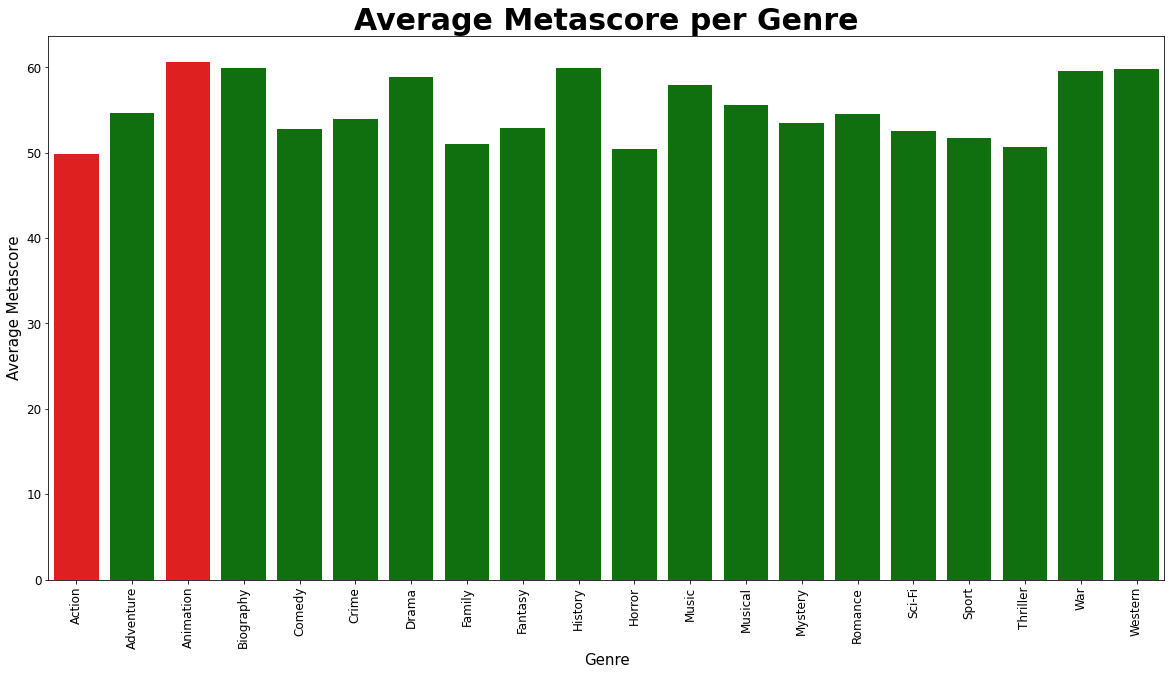

In [119]:
#On average which genre has the highest Average Metascore and which genre has the least?

gen1 =  genre_meta_final["Genre"]
meta_avg = genre_meta_final["Average_by_genre"]

plt.figure(figsize = (20,10))
clrs = ['green' if (x < max(meta_avg) and x > min(meta_avg)) else 'red' for x in meta_avg ]
sns.barplot(x = gen1, y = meta_avg ,palette = clrs)
plt.xlabel('Genre', fontsize = 15)
plt.ylabel("Average Metascore", fontsize = 15)
plt.title("Average Metascore per Genre", fontsize = 30, weight = 'bold')
plt.xticks(rotation=90, fontsize = 12)
plt.yticks(fontsize = 12)

plt.show()